<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_0_4_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,2.207654,183.479120,179.383239,4.095880
1,0.0,1.0,84.811384,90.263394,48.152488,0.232136,233.459402,234.702426,-1.243024
2,0.0,2.0,85.367006,79.971966,30.234286,1.431294,207.004552,205.976184,1.028368
3,0.0,3.0,77.359299,99.361088,30.715902,0.374045,217.810333,218.857733,-1.047400
4,0.0,4.0,66.172252,77.690898,81.326401,0.746479,235.936030,236.906502,-0.970472
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,1.635912,192.898485,190.614042,2.284443
119996,999.0,116.0,59.821851,70.493625,39.142519,-4.642777,174.815219,178.817732,-4.002513
119997,999.0,117.0,27.825940,21.812149,86.626142,7.078356,153.342587,146.508207,6.834380
119998,999.0,118.0,98.429329,29.603075,35.081782,3.866661,176.980846,171.688037,5.292809


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,2.207654,183.479120,179.383239,4.095880
1,0.0,1.0,84.811384,90.263394,48.152488,0.232136,233.459402,234.702426,-1.243024
2,0.0,2.0,85.367006,79.971966,30.234286,1.431294,207.004552,205.976184,1.028368
3,0.0,3.0,77.359299,99.361088,30.715902,0.374045,217.810333,218.857733,-1.047400
4,0.0,4.0,66.172252,77.690898,81.326401,0.746479,235.936030,236.906502,-0.970472
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,1.635912,192.898485,190.614042,2.284443
119996,999.0,116.0,59.821851,70.493625,39.142519,-4.642777,174.815219,178.817732,-4.002513
119997,999.0,117.0,27.825940,21.812149,86.626142,7.078356,153.342587,146.508207,6.834380
119998,999.0,118.0,98.429329,29.603075,35.081782,3.866661,176.980846,171.688037,5.292809


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  183.479120  179.383239  4.095880
      1.0    84.811384  90.263394  48.152488  ...  233.459402  234.702426 -1.243024
      2.0    85.367006  79.971966  30.234286  ...  207.004552  205.976184  1.028368
      3.0    77.359299  99.361088  30.715902  ...  217.810333  218.857733 -1.047400
      4.0    66.172252  77.690898  81.326401  ...  235.936030  236.906502 -0.970472
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  192.898485  190.614042  2.284443
      116.0  59.821851  70.493625  39.142519  ...  174.815219  178.817732 -4.002513
      117.0  27.825940  21.812149  86.626142  ...  153.342587  146.508207  6.834380
      118.0  98.429329  29.603075  35.081782  ...  176.980846  171.688037  5.292809
      119.0  48.220330  29.617922  33.572581  ...  121.777969  119.739846  2.038123

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  183.479120  179.383239  4.095880
      1.0    84.811384  90.263394  48.152488  ...  233.459402  234.702426 -1.243024
      2.0    85.367006  79.971966  30.234286  ...  207.004552  205.976184  1.028368
      3.0    77.359299  99.361088  30.715902  ...  217.810333  218.857733 -1.047400
      4.0    66.172252  77.690898  81.326401  ...  235.936030  236.906502 -0.970472
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  192.898485  190.614042  2.284443
      116.0  59.821851  70.493625  39.142519  ...  174.815219  178.817732 -4.002513
      117.0  27.825940  21.812149  86.626142  ...  153.342587  146.508207  6.834380
      118.0  98.429329  29.603075  35.081782  ...  176.980846  171.688037  5.292809
      119.0  48.220330  29.617922  33.572581  ...  121.777969  119.739846  2.038123

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,2.207654,183.479120,179.383239,4.095880
1,0.0,1.0,84.811384,90.263394,48.152488,0.232136,233.459402,234.702426,-1.243024
2,0.0,2.0,85.367006,79.971966,30.234286,1.431294,207.004552,205.976184,1.028368
3,0.0,3.0,77.359299,99.361088,30.715902,0.374045,217.810333,218.857733,-1.047400
4,0.0,4.0,66.172252,77.690898,81.326401,0.746479,235.936030,236.906502,-0.970472
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,1.635912,192.898485,190.614042,2.284443
119996,999.0,116.0,59.821851,70.493625,39.142519,-4.642777,174.815219,178.817732,-4.002513
119997,999.0,117.0,27.825940,21.812149,86.626142,7.078356,153.342587,146.508207,6.834380
119998,999.0,118.0,98.429329,29.603075,35.081782,3.866661,176.980846,171.688037,5.292809


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  183.479120  179.383239  4.095880
      1.0    84.811384  90.263394  48.152488  ...  233.459402  234.702426 -1.243024
      2.0    85.367006  79.971966  30.234286  ...  207.004552  205.976184  1.028368
      3.0    77.359299  99.361088  30.715902  ...  217.810333  218.857733 -1.047400
      4.0    66.172252  77.690898  81.326401  ...  235.936030  236.906502 -0.970472
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  192.898485  190.614042  2.284443
      116.0  59.821851  70.493625  39.142519  ...  174.815219  178.817732 -4.002513
      117.0  27.825940  21.812149  86.626142  ...  153.342587  146.508207  6.834380
      118.0  98.429329  29.603075  35.081782  ...  176.980846  171.688037  5.292809
      119.0  48.220330  29.617922  33.572581  ...  121.777969  119.739846  2.038123

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

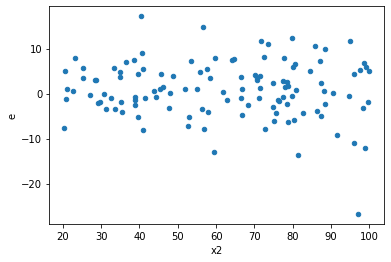

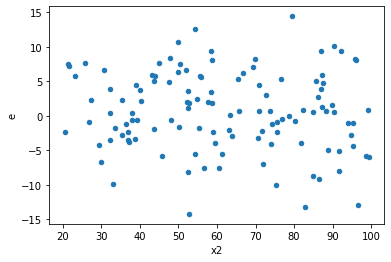

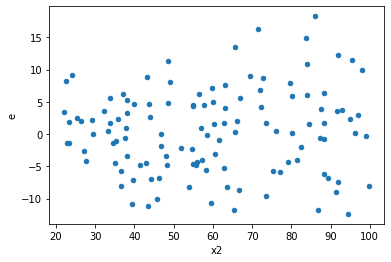

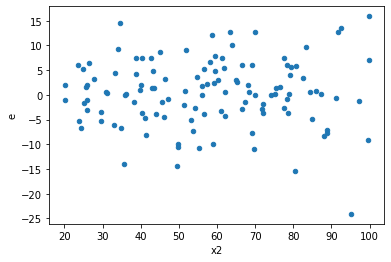

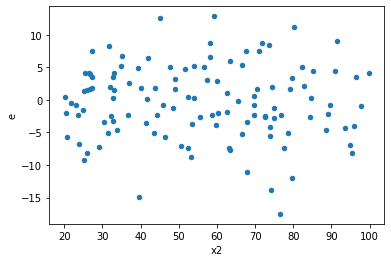

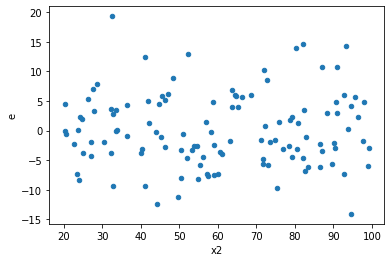

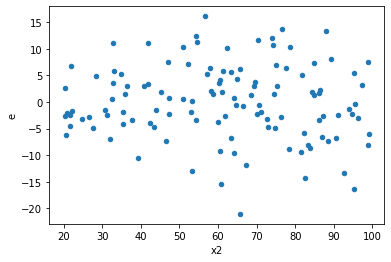

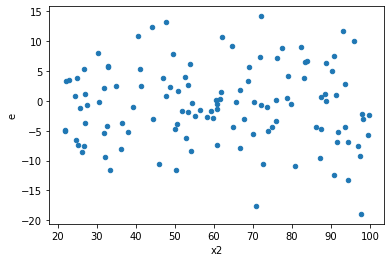

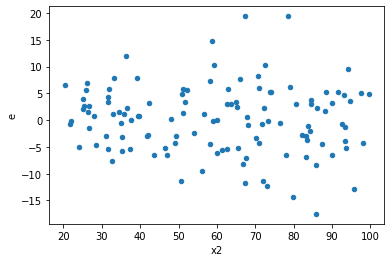

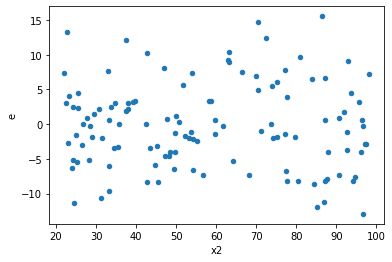

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,1427.1632365882451,851.4344010789664,32.4355281042783,19.350781842703782,1.6761869555419604,0.08662307123766988,0.9566884643811651,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,1627.3359996110034,1174.7610140812935,36.98490908206826,26.699113956393035,1.385248557029823,0.27809837424227224,0.8609508128788639,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,1948.8912265178867,1265.531577623738,44.29298242086106,28.76208130963041,1.5399783466306536,0.15138169842736304,0.9243091507863185,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,2112.538082028674,1199.792123793273,48.01222913701532,27.268002813483477,1.7607534173083714,0.060826862345054966,0.9695865688274725,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,2019.4203449705005,1022.4137939110825,45.89591693114774,23.236677134342784,1.9751497456284572,0.024508415211510926,0.9877457923942445,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,1651.448004319239,1206.133225140943,37.532909189073614,27.412118753203252,1.3692086163419126,0.29556178360697016,0.8522191081965149,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,1740.1653312872138,996.697285453556,39.5492120747094,22.652211033035364,1.7459316451286773,0.06473383417127909,0.9676330829143605,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,2363.3086703951085,1317.6510537727358,53.71156069079792,29.946614858471268,1.7935770351554126,0.05297414219551966,0.9735129289022402,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,1746.166866896754,935.7621296949119,39.68561061128987,21.267321129429817,1.8660371172170218,0.03898570356454156,0.9805071482177292,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,1427.1632365882451,851.4344010789664,32.4355281042783,19.350781842703782,1.6761869555419604,0.08662307123766988,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,1627.3359996110034,1174.7610140812935,36.98490908206826,26.699113956393035,1.385248557029823,0.27809837424227224,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,1948.8912265178867,1265.531577623738,44.29298242086106,28.76208130963041,1.5399783466306536,0.15138169842736304,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,2112.538082028674,1199.792123793273,48.01222913701532,27.268002813483477,1.7607534173083714,0.060826862345054966,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,2019.4203449705005,1022.4137939110825,45.89591693114774,23.236677134342784,1.9751497456284572,0.024508415211510926,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,1651.448004319239,1206.133225140943,37.532909189073614,27.412118753203252,1.3692086163419126,0.29556178360697016,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,1740.1653312872138,996.697285453556,39.5492120747094,22.652211033035364,1.7459316451286773,0.06473383417127909,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,2363.3086703951085,1317.6510537727358,53.71156069079792,29.946614858471268,1.7935770351554126,0.05297414219551966,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,1746.166866896754,935.7621296949119,39.68561061128987,21.267321129429817,1.8660371172170218,0.03898570356454156,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      559
Reject005=0 : Heteroscedasticity    441
Name: Result_test, dtype: int64